# Notebook to calculate the Forel-Ule Index from Sentinel-3 OLCI images

**Reference** :
Wernand, M. R., Hommersom, a., & Van Der Woerd, H. J. (2013). MERIS-based ocean colour classification with the discrete Forel-Ule scale. Ocean Science, 9, 477–487. doi:10.5194/os-9-477-2013

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import fume

## Output of Hygeos Polymer atmospheric correction
### Load test image for Lierpool Bay, UK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


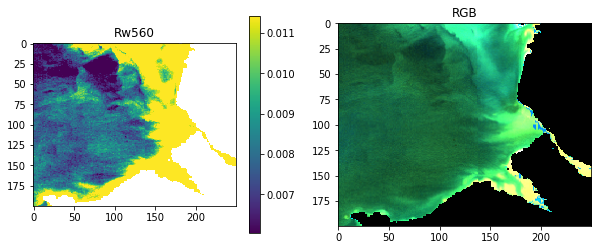

In [2]:
# load test dataset
polymer = xr.open_dataset('data/S3A_OL_20200506T104005_20200506T104305_20200507T143731_0179_058_051_1980_LN1_O_NT_002.polymer.LivBay.nc')
redb='Rw665'
greenb='Rw560'
blueb='Rw443'

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

m = axs[0].imshow(polymer[greenb],
           vmin=polymer[greenb].quantile(0.05),
           vmax=polymer[blueb].quantile(0.95))
fig.colorbar(m,ax=axs[0])
axs[0].set_title(greenb);

rgb = xr.concat([polymer[redb], 
                 polymer[greenb],
                 polymer[blueb]],
                dim='rgb').transpose('height','width','rgb')
axs[1].imshow(rgb/rgb.quantile(0.95))
axs[1].set_title(f'RGB');

In [3]:
# Extract wavelengths from band names
wavelength = []
bandid = []
reflectance_name = 'Rw'
for var in polymer.data_vars:
    if reflectance_name in var:
        bandid.append(var)
        wavelength.append( int ( var.replace(reflectance_name,'') ) )

# Create a 3-D array along wavelength dimension
Rw = xr.concat( [polymer[id] for id in bandid] ,dim='wavelength')
Rw.name = 'Rw'
Rw = Rw.assign_coords(wavelength=wavelength)

wavelength overlap 400 779


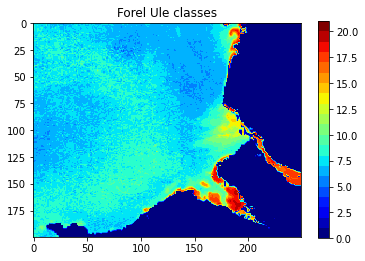

In [4]:
polymer_fu_i = fume.calc_ForelUle_image(Rw.coords['wavelength'].values, Rw)
plt.imshow(polymer_fu_i, cmap=cm.get_cmap('jet', 21))
plt.colorbar()
plt.title('Forel Ule classes');

In [10]:
polymer_fu_i

array([[8.2, 7.4, 7.3, ..., 0. , 0. , 0. ],
       [7.9, 7.1, 8.8, ..., 0. , 0. , 0. ],
       [8.2, 7.7, 7.8, ..., 0. , 0. , 0. ],
       ...,
       [7.6, 8.5, 8.5, ..., 0. , 0. , 0. ],
       [7.5, 8.2, 8.2, ..., 0. , 0. , 0. ],
       [7.9, 8.3, 8.3, ..., 0. , 0. , 0. ]])

## L2 atmosperically corrected image from EUMETSAT
### Load test image for Lierpool Bay, UK

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


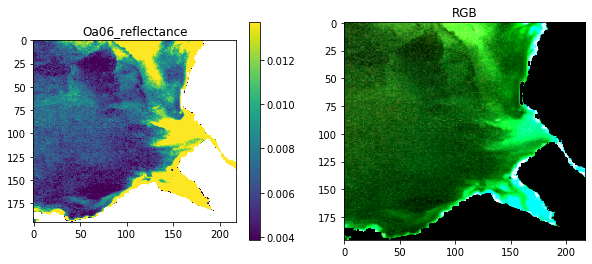

In [5]:
# load test dataset
l2 = xr.open_dataset('data/S3A_OL_2_WFR____20200506T104005_20200506T104305_20200507T211159_0179_058_051_1980_MAR_O_NT_002.LivBay.nc')
redb='Oa03_reflectance'
greenb='Oa06_reflectance'
blueb='Oa08_reflectance'

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

m = axs[0].imshow(l2[greenb],
           vmin=l2[greenb].quantile(0.05),
           vmax=l2[blueb].quantile(0.95))
fig.colorbar(m, ax=axs[0])
axs[0].set_title(greenb);

rgb = xr.concat([l2[redb], 
                 l2[greenb],
                 l2[blueb]],
                dim='rgb').transpose('y','x','rgb')
axs[1].imshow(rgb/rgb.quantile(0.95))
axs[1].set_title(f'RGB');

In [6]:
# Extract wavelengths from band attributes
wavelength = []
bandid = []
reflectance_name = '_reflectance'
for var in l2.data_vars:
    if reflectance_name in var:
        bandid.append(var)
        wavelength.append( float(l2[var].attrs['radiation_wavelength']) )

# Create a 3-D array along wavelength dimension
Rw = xr.concat( [l2[id] for id in bandid] ,dim='wavelength')
Rw.name = 'Rw'
Rw = Rw.assign_coords(wavelength=wavelength)

## Calculate Forel Ule index

wavelength overlap 400.0 825


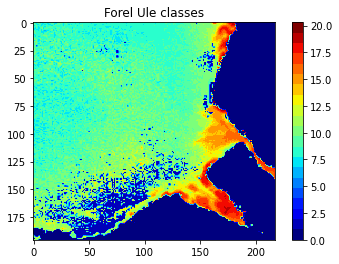

In [7]:
l2_fu_i = fume.calc_ForelUle_image(Rw.coords['wavelength'].values, Rw)
plt.imshow(l2_fu_i, cmap=cm.get_cmap('jet', 21))
plt.colorbar()
plt.title('Forel Ule classes');

# Compare Forel Ule indexes

Text(0.5, 1.0, 'L2 Baseline')

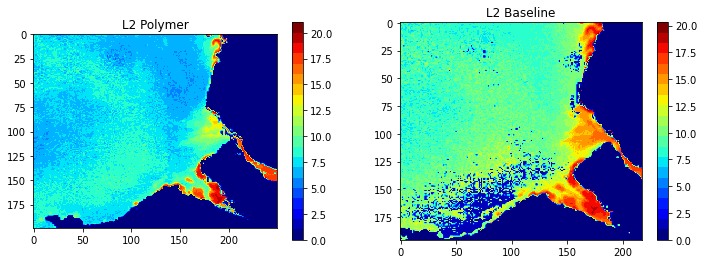

In [8]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))


m = axs[0].imshow(polymer_fu_i, cmap=cm.get_cmap('jet', 21))
fig.colorbar(m,ax=axs[0])
axs[0].set_title('L2 Polymer')

m = axs[1].imshow(l2_fu_i, cmap=cm.get_cmap('jet', 21))
fig.colorbar(m,ax=axs[1])
axs[1].set_title('L2 Baseline')

#fig.savefig('FU_AC_LivBay_comparison.png')